# R kernel 

In [4]:
1+1

[1] 2

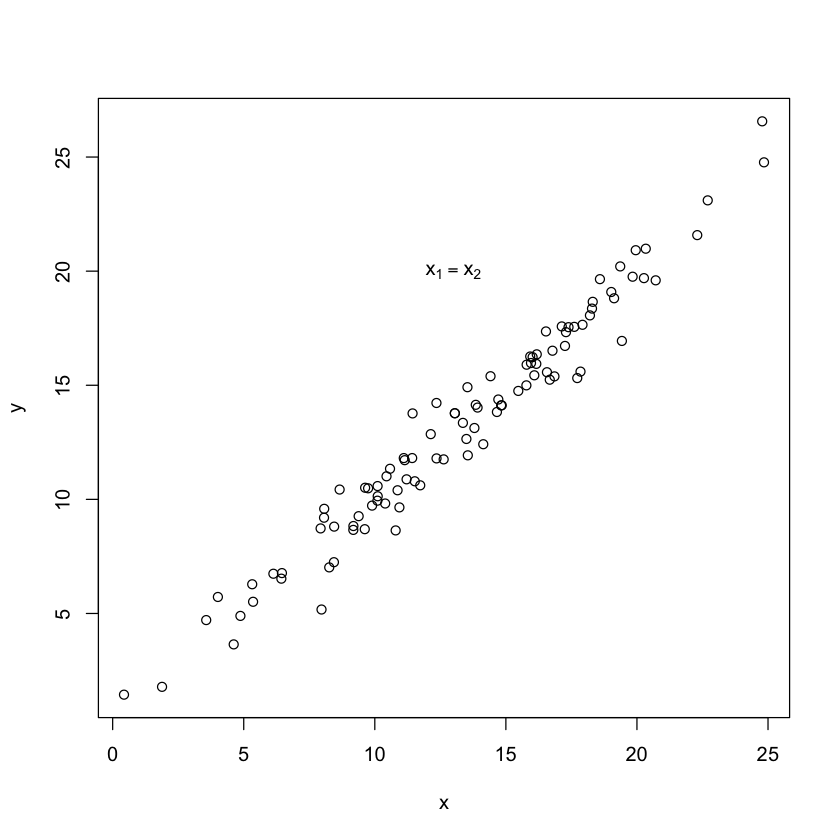

In [6]:
x <- rnorm(100,14,5)
y <- x + rnorm(100,0,1)
plot(x,y)
text(13,20, expression(x[1] == x[2]))

In [5]:
require('ggplot2')

Loading required package: ggplot2


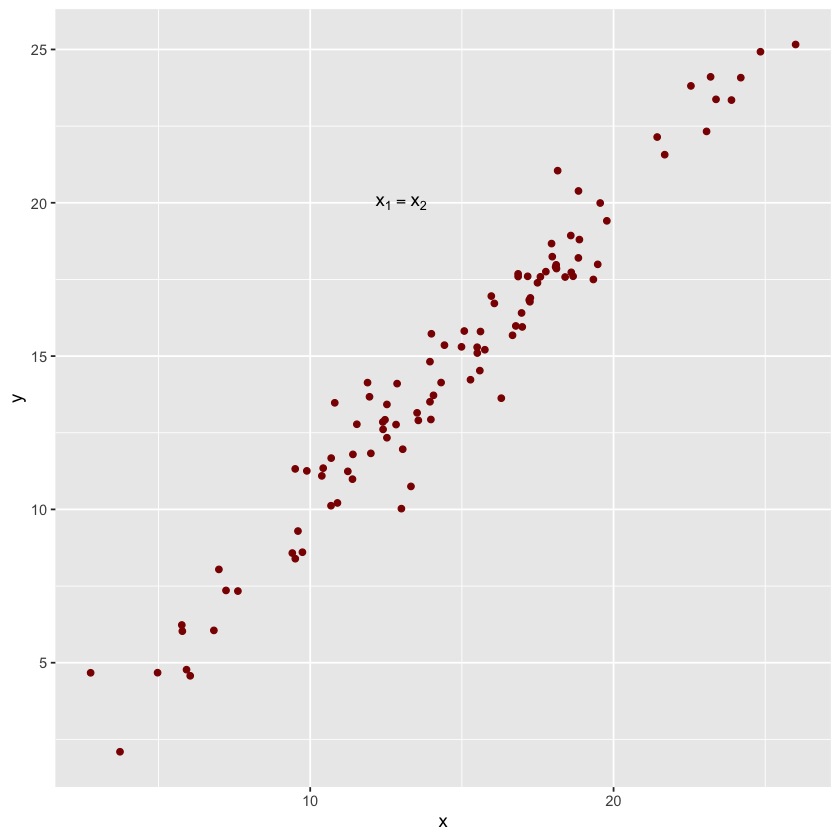

In [7]:
x <- rnorm(100,14,5) 
y <- x + rnorm(100,0,1) 
ggplot(data= NULL, aes(x = x, y = y)) +  #开始绘图
  geom_point(color = "darkred") +  #添加点
  annotate("text",x =13 , y = 20,parse = T,
           label = "x[1] == x[2]") #添加注释


## install.packages

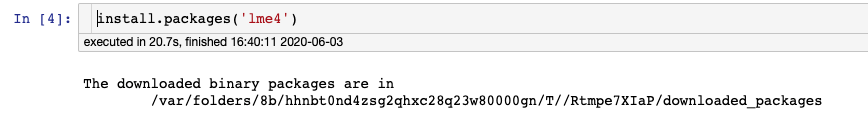

In [4]:
install.packages('lme4')


The downloaded binary packages are in
	/var/folders/8b/hhnbt0nd4zsg2qhxc28q23w80000gn/T//Rtmpe7XIaP/downloaded_packages


In [8]:
library('lme4')

Warning message:
“package ‘lme4’ was built under R version 3.6.2”Loading required package: Matrix


In [9]:
help(lme4)

lme4 provides functions for fitting and analyzing mixed models: linear (lmer), generalized linear (glmer) and nonlinear (nlmer.)



In [10]:
# From http://anythingbutrbitrary.blogspot.in/2012/10/hierarchical-linear-models-and-lmer.html

# WE LOOK AT THE REGRESSION OF [GLUCOSE] ~ [AMINOACID_A] IN 30 athletes after 15 races:

# we'll make the sd of the slopes between athletes 0.5, 
# and the sd between intercepts of different athletes 0.2
# Further we'll establish a correlation between intercepts and slopes of 0.8.

rm(list = ls())
set.seed(0)
library(lme4)
library(mvtnorm)

athletes = 30
races = 15

# Setting up covariance matrix:

i = 0.2 # sd between intercepts
s = 0.5 # sd between slopes
r = 0.8 # correlation between intercepts and slopes

(cov.matrix1<-  matrix(c(i^2, r * i * s, r * i * s, s^2), nrow = 2, byrow = T))

# Getting a random sample from this bi-variate normal distribution for each athlete:

require(mvtnorm)
random.effects_athletes <-  rmvnorm(athletes, mean = c(0, 0), sigma = cov.matrix1)


# We establish now the mean of these random intercepts (`alpha_ath`) and slopes (`beta_ath`):


athletes.df = data.frame(athlete  = c(1:athletes)) # Just a column of numbers from 1 to 30
athletes.df$alpha_athletes = 1 + random.effects_athletes[, 1]
athletes.df$beta_athletes =  2 + random.effects_athletes[, 2]

0.04,0.08
0.08,0.25


In [16]:
athletes.df

athlete,alpha_athletes,beta_athletes
<int>,<dbl>,<dbl>
1,1.1564810,1.999850
2,1.3666558,2.782176
3,0.8723563,1.306256
4,0.8181601,1.741300
5,1.2995343,3.163465
6,1.0194258,1.708571
7,0.7846010,1.716473
8,0.9018567,1.763388
9,0.9279549,1.599699


In [11]:
summary(athletes.df$beta_athletes)  # The mean is the slope in the fixed effects: 2 + random.effects[,2])


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.110   1.708   1.889   1.945   2.145   3.163 

In [12]:
sd(athletes.df$beta_athletes)       # The sd of the slopes as random effects (we wanted 0.5)


[1] 0.4513766

In [13]:
summary(athletes.df$alpha_athletes) # The intercept has a mean of 1: (Intercept) fixed eff's


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4948  0.8781  1.0158  1.0042  1.1164  1.3667 

In [14]:
sd(athletes.df$alpha_athletes)      # with a SD intercept as random eff (we wanted 0.2)


[1] 0.2011818

In [15]:
cor(athletes.df$alpha_athletes, athletes.df$beta_athletes) # Set at 0.8.


[1] 0.7991471

In [17]:
#####FOR RACES:

# The covariance matrix will be:

i =   0.8   # sd between intercepts
s =   0.2   # sd between slopes
r = -0.01   # hardly any relationship between intercepts and slopes
(cov.matrix2 <-  matrix(c(i^2, r * i * s, r * i * s, s^2), nrow = 2, byrow = T))


# Getting a random sample from this bi-variate normal distribution for each race:

random.effects_races <-  rmvnorm(races, mean = c(0, 0), sigma = cov.matrix2)

# We establish now the mean of these random intercepts (`alpha_race`) and slopes (`beta_race`):

races.df = data.frame(race  = c(1:races)) # Just a column of numbers from 1 to 15
races.df$alpha_races   =    -1 + random.effects_races[, 1]
races.df$beta_races    =     1 + random.effects_races[, 2]

0.6400,-0.0016
-0.0016,0.0400


In [18]:

summary(races.df$beta_races)  # The mean is the slope in the fixed effects: 1 + random.effects[,2])
sd(races.df$beta_races)       # The sd of the slopes as random effects (we wanted 0.2)
summary(races.df$alpha_races) # The intercept has a mean of - 1: (Intercept) fixed eff's
sd(races.df$alpha_races) # with a SD intercept as random eff (we wanted 0.8)
cor(races.df$alpha_races, races.df$beta_races) # Set at -0.01.


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.7140  0.9655  0.9972  1.0164  1.0635  1.2521 

[1] 0.1282501

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-2.140662 -1.646019 -0.985087 -1.080361 -0.591727  0.003778 

[1] 0.6525022

[1] 0.1491423

In [19]:
#####THE COVARIATE `AAA` - the fictitious amino acyd:

# We need now produce the `[AAA]` with a mean of `50` and a sd of `5` as:


observations <- athletes * races
observations.df <-  data.frame(
                    athlete = sort(rep(c(1:athletes), races)),
                    race = rep(c(1:races), athletes), 
                    AAA = rep(rnorm(athletes * races, 50, 5)))
dat1   <-  merge(athletes.df, observations.df)
dat2   <-  merge(dat1, races.df)
dat3   <-  dat2[with(dat2, order(athlete,race)), ]
rownames(dat3)   <-  1:nrow(dat3)

In [20]:
#####THE REGRESSOR:

# It is time now to calculate the `[Glucose]` values as:


df <-  within(dat3, 
       glucose <-  alpha_athletes + AAA * beta_athletes +
                   alpha_races    + AAA * beta_races    +
                   0.75 * rnorm(n = observations)) # Epsilon is 0.75

head(df)
D <- df[,c(2,1,5,8)]
head(D)

race,athlete,alpha_athletes,beta_athletes,AAA,alpha_races,beta_races,glucose
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1.156481,1.99985,56.49656,-0.7129998,0.9972170,169.5516
2,1,1.156481,1.99985,45.63369,-1.7523325,0.9783407,135.0500
3,1,1.156481,1.99985,50.04185,-1.6523613,1.0497551,150.7323
4,1,1.156481,1.99985,45.59564,-2.1406619,1.0754661,139.9108
5,1,1.156481,1.99985,52.98130,-0.8013747,1.0126598,159.0521
6,1,1.156481,1.99985,50.59859,-0.9850867,1.0514354,154.3979


athlete,race,AAA,glucose
<int>,<int>,<dbl>,<dbl>
1,1,56.49656,169.5516
1,2,45.63369,135.0500
1,3,50.04185,150.7323
1,4,45.59564,139.9108
1,5,52.98130,159.0521
1,6,50.59859,154.3979


In [ ]:
### THE MODELS:
m1=lmer(glucose ~ AAA + (1|athlete), data=D)
coefficients(m1) 


In [21]:
# 30 intercepts: 1 for every athlete; and one single slope for AAA
m2=lmer(glucose ~ AAA + (1|athlete) + (0 + AAA|athlete), data=D)
coefficients(m2) # One single intercept but 30 different slopes: 1 / athlete
m3=lmer(glucose ~ AAA + (1 + AAA|athlete), data=D)
coefficients(m3) # 30 intecepts and 30 different slopes
m4=lmer(glucose ~ AAA * race + (1 + AAA * race|athlete), data=D) 
# 30 intercepts (30 inter'pts from athletes; 30 from race|athlete);
# 30 slopes for AAA; 30 for race
# And the interaction slopes of the AAA*race interaction.
coefficients(m4) 

$athlete
   (Intercept)      AAA
1    -2.319430 3.062027
2    37.252580 3.062027
3   -37.369466 3.062027
4   -14.498814 3.062027
5    58.412704 3.062027
6   -16.321969 3.062027
7   -16.930180 3.062027
8   -14.312161 3.062027
9   -22.562873 3.062027
10  -29.490204 3.062027
11    5.189050 3.062027
12   17.922213 3.062027
13    9.632048 3.062027
14  -12.402902 3.062027
15   -8.973970 3.062027
16  -17.162565 3.062027
17  -20.555254 3.062027
18   30.116141 3.062027
19   -6.759428 3.062027
20   -1.335303 3.062027
21   22.288812 3.062027
22  -25.822019 3.062027
23  -34.820442 3.062027
24   14.937800 3.062027
25   -2.613498 3.062027
26   -9.760009 3.062027
27   -5.968219 3.062027
28    3.074827 3.062027
29   -2.450880 3.062027
30  -46.164701 3.062027

attr(,"class")
[1] "coef.mer"

boundary (singular) fit: see ?isSingular


$athlete
   (Intercept)      AAA
1    -3.293895 3.082104
2    -3.293895 3.878285
3    -3.293895 2.385910
4    -3.293895 2.822765
5    -3.293895 4.240351
6    -3.293895 2.796344
7    -3.293895 2.790783
8    -3.293895 2.846261
9    -3.293895 2.688807
10   -3.293895 2.537121
11   -3.293895 3.226337
12   -3.293895 3.488651
13   -3.293895 3.323610
14   -3.293895 2.878070
15   -3.293895 2.946938
16   -3.293895 2.785408
17   -3.293895 2.719229
18   -3.293895 3.724945
19   -3.293895 2.986893
20   -3.293895 3.095998
21   -3.293895 3.573158
22   -3.293895 2.627459
23   -3.293895 2.421532
24   -3.293895 3.433305
25   -3.293895 3.072523
26   -3.293895 2.931712
27   -3.293895 3.011902
28   -3.293895 3.186349
29   -3.293895 3.080520
30   -3.293895 2.179237

attr(,"class")
[1] "coef.mer"

boundary (singular) fit: see ?isSingular


$athlete
   (Intercept)      AAA
1    -3.293893 3.082104
2    -3.293893 3.878285
3    -3.293893 2.385909
4    -3.293893 2.822765
5    -3.293893 4.240352
6    -3.293893 2.796344
7    -3.293893 2.790783
8    -3.293893 2.846261
9    -3.293893 2.688807
10   -3.293893 2.537121
11   -3.293893 3.226337
12   -3.293893 3.488652
13   -3.293893 3.323610
14   -3.293893 2.878070
15   -3.293893 2.946938
16   -3.293893 2.785408
17   -3.293893 2.719229
18   -3.293893 3.724945
19   -3.293893 2.986892
20   -3.293893 3.095998
21   -3.293893 3.573158
22   -3.293893 2.627459
23   -3.293893 2.421532
24   -3.293893 3.433305
25   -3.293893 3.072523
26   -3.293893 2.931712
27   -3.293893 3.011902
28   -3.293893 3.186349
29   -3.293893 3.080520
30   -3.293893 2.179237

attr(,"class")
[1] "coef.mer"

boundary (singular) fit: see ?isSingular


$athlete
   (Intercept)      AAA        race      AAA:race
1    1.9767682 2.973291 -0.80056675  0.0165666867
2    5.5187591 3.709103 -4.72173719  0.0935066171
3   -0.1562702 2.307275 -2.64674741  0.0536808021
4    0.9132622 2.725112  0.01885581  0.0005705351
5    6.1547881 4.060662 -0.52124891  0.0100822873
6    0.8796833 2.720062 -1.99049771  0.0403409923
7    1.4982774 2.699735  2.22757629 -0.0431317235
8    1.0725843 2.748798 -2.01663693  0.0408314074
9    0.9142552 2.583552 -4.19176384  0.0840139344
10   0.3014324 2.454717 -0.80722907  0.0171485645
11   2.8246422 3.106519  1.61844703 -0.0314301160
12   4.2185349 3.339082 -1.26262169  0.0253727875
13   3.4190398 3.183039 -5.64081017  0.1121596931
14   1.6902255 2.772324  1.45639910 -0.0279320479
15   1.7952148 2.842018 -0.63158534  0.0133316832
16   1.2079677 2.688746 -0.47821382  0.0104312201
17   0.8433720 2.634029 -2.19479846  0.0444541179
18   4.6163419 3.568123  0.13711634 -0.0025205625
19   2.1586932 2.863903  2.20952995 -0.04

In [24]:
summary(m1)

Linear mixed model fit by REML ['lmerMod']
Formula: glucose ~ AAA + (1 | athlete)
   Data: D

REML criterion at convergence: 3192.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.9351 -0.4261 -0.0955  0.4137  2.7329 

Random effects:
 Groups   Name        Variance Std.Dev.
 athlete  (Intercept) 521.69   22.840  
 Residual              50.81    7.128  
Number of obs: 450, groups:  athlete, 30

Fixed effects:
            Estimate Std. Error t value
(Intercept) -4.99227    5.36626   -0.93
AAA          3.06203    0.06721   45.56

Correlation of Fixed Effects:
    (Intr)
AAA -0.626